In [2]:
from pynq import Overlay, Xlnk
import pynq_cv.overlays.xv2Filter2DDilate as xv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
ol = Overlay("/usr/local/lib/python3.6/dist-packages/pynq_cv/overlays/xv2Filter2DDilate.bit")

Xlnk.set_allocator_library("/usr/local/lib/python3.6/dist-packages/pynq_cv/overlays/xv2Filter2DDilate.so")

mem_manager = Xlnk()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: pynq.Xlnk is deprecated and will be removed in 2.7 - use pynq.allocate instead
  """


In [4]:
# Load image
image = cv2.imread("bellatrix.jpg", cv2.IMREAD_GRAYSCALE)

s = 1
scaled_image = cv2.resize(image, (0, 0), fx=s, fy=s, interpolation=cv2.INTER_AREA)

h, w = scaled_image.shape

xFimg = mem_manager.cma_array((h, w), np.uint8)
xFimg[:] = scaled_image[:]
xFout = mem_manager.cma_array((h, w), np.uint8)

In [5]:
kernel = np.array([[1.0,0.0,-1.0],[2.0,0.0,-2.0],[1.0,0.0,-1.0]],np.float32)
start_time = time.time()

xv2.filter2D(xFimg, -1, kernel, dst=xFout, borderType=cv2.BORDER_CONSTANT)
end_time = time.time()
elapsed_time = (end_time - start_time) * 1000 


In [6]:


print(f"Image size       : {w} x {h} pixels")
print(f"Sobel execution time: {elapsed_time:.3f} ms")

Image size       : 2000 x 2000 pixels
Sobel execution time: 41.695 ms


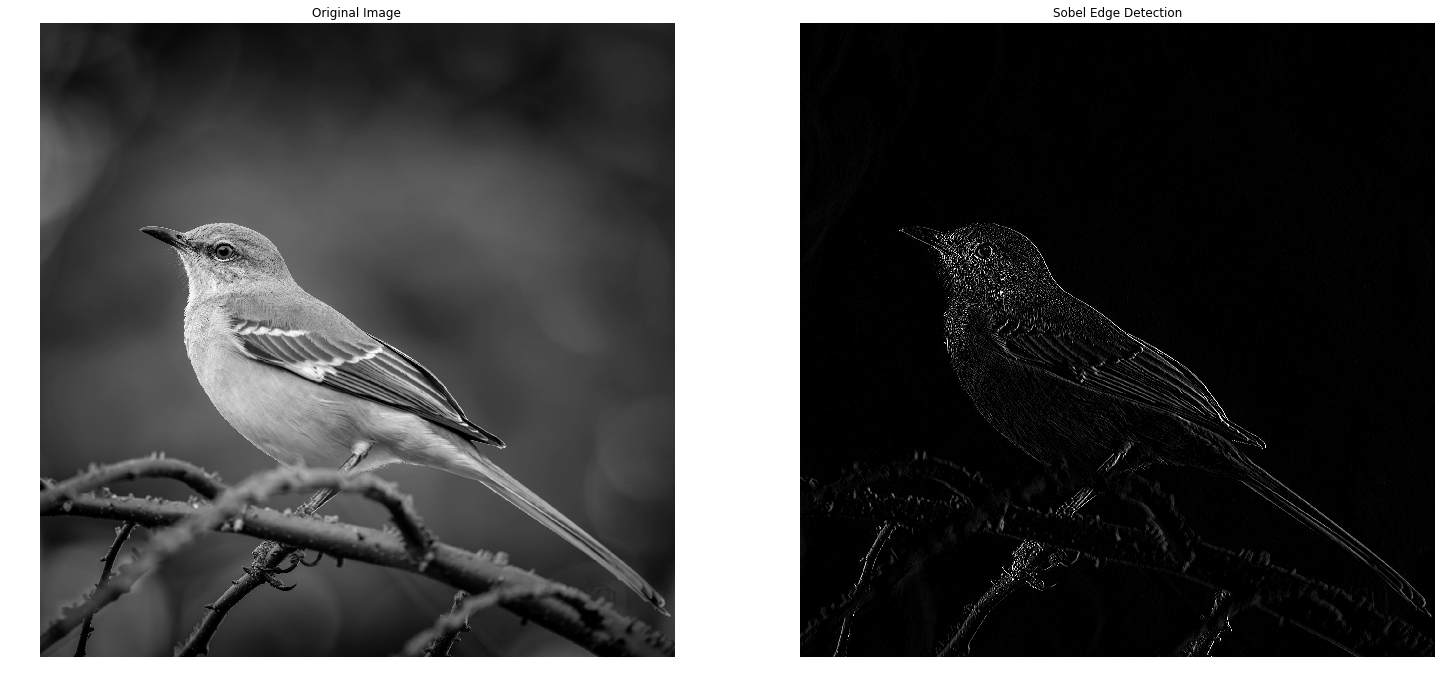

Image size       : 2000 x 2000 pixels
Sobel execution time: 41.695 ms


In [7]:
plt.figure(figsize=(25, 25))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(xFout, cmap='gray')
plt.title(f"Sobel Edge Detection")
plt.axis('off')
plt.show()
print(f"Image size       : {w} x {h} pixels")
print(f"Sobel execution time: {elapsed_time:.3f} ms")